In [1]:
# Import required libraries

import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Read train and test data 

train_df = pd.read_csv("train.csv")
train_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
test_df = pd.read_csv("test.csv")
test_df.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


In [4]:
# Replacing the value with 0 for the column 'Levy'

train_df['Levy'].replace('-',0,inplace=True)
test_df['Levy'].replace('-',0,inplace=True)

In [5]:
print("The number of rows are {} and columns are {} in the train dataset".format(train_df.shape[0],train_df.shape[1]))

The number of rows are 19237 and columns are 18 in the train dataset


In [6]:
print("The number of rows are {} and columns are {} in the test dataset".format(test_df.shape[0],test_df.shape[1]))

The number of rows are 8245 and columns are 18 in the test dataset


In [7]:
# del test_df['Price']

In [8]:
# Meta information of the train dataset

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

## Inference:

1. **There are columns that are incorrect in their datatypes**
- **`Engine Volume`**
- **`Cylinders`**
- **`Prod. year`**
- **`Levy`**

2. **The columns that require manipulations to correct their data types**
- **`Mileage`**
- **`Doors`**


In [9]:
train_df['Mileage'] = train_df['Mileage'].apply(lambda x : x.split('km')[0])
test_df['Mileage'] = test_df['Mileage'].apply(lambda x : x.split('km')[0])

In [10]:
train_df['Doors'] = train_df['Doors'].apply(lambda x : x.split('-')[0])
test_df['Doors'] = test_df['Doors'].apply(lambda x : x.split('-')[0])


In [11]:
train_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04,Left wheel,Silver,4


C:\Users\suraj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


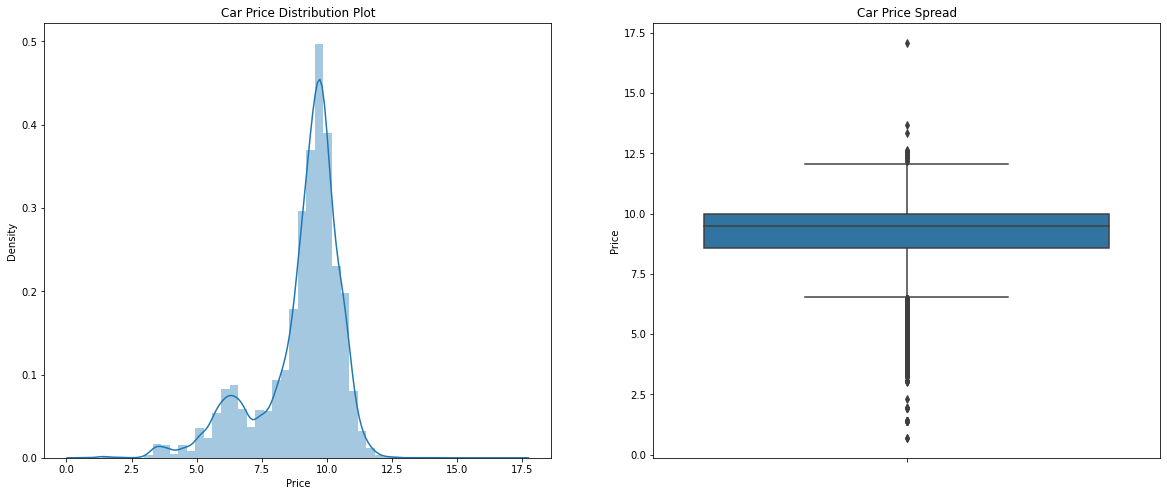

In [12]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(np.log1p(train_df.Price),hist=True)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=np.log1p(train_df.Price))

plt.show()

In [13]:
# Applying log transformation on the 'Price', to normalise the distribution.

#train_df['Price'] = np.log1p(train_df['Price'])

In [14]:
print(train_df.Price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
85%      3.073400e+04
90%      3.860900e+04
100%     2.630750e+07
max      2.630750e+07
Name: Price, dtype: float64


## Inference:

- **`75%` of the cars present fall under 22k price range**
- **Mean price is 18k**

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Levy', ylabel='Density'>

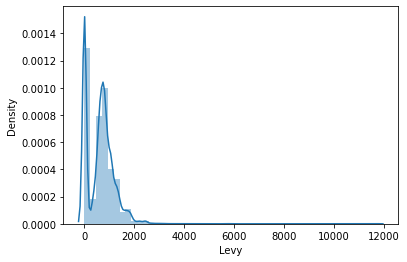

In [15]:
sns.distplot(train_df.Levy,hist=True)

In [16]:
# Checking for the manufactures column

print(train_df['Manufacturer'].unique())

['LEXUS' 'CHEVROLET' 'HONDA' 'FORD' 'HYUNDAI' 'TOYOTA' 'MERCEDES-BENZ'
 'OPEL' 'PORSCHE' 'BMW' 'JEEP' 'VOLKSWAGEN' 'AUDI' 'RENAULT' 'NISSAN'
 'SUBARU' 'DAEWOO' 'KIA' 'MITSUBISHI' 'SSANGYONG' 'MAZDA' 'GMC' 'FIAT'
 'INFINITI' 'ALFA ROMEO' 'SUZUKI' 'ACURA' 'LINCOLN' 'VAZ' 'GAZ' 'CITROEN'
 'LAND ROVER' 'MINI' 'DODGE' 'CHRYSLER' 'JAGUAR' 'ISUZU' 'SKODA'
 'DAIHATSU' 'BUICK' 'TESLA' 'CADILLAC' 'PEUGEOT' 'BENTLEY' 'VOLVO' 'სხვა'
 'HAVAL' 'HUMMER' 'SCION' 'UAZ' 'MERCURY' 'ZAZ' 'ROVER' 'SEAT' 'LANCIA'
 'MOSKVICH' 'MASERATI' 'FERRARI' 'SAAB' 'LAMBORGHINI' 'ROLLS-ROYCE'
 'PONTIAC' 'SATURN' 'ASTON MARTIN' 'GREATWALL']


<AxesSubplot:xlabel='Manufacturer', ylabel='count'>

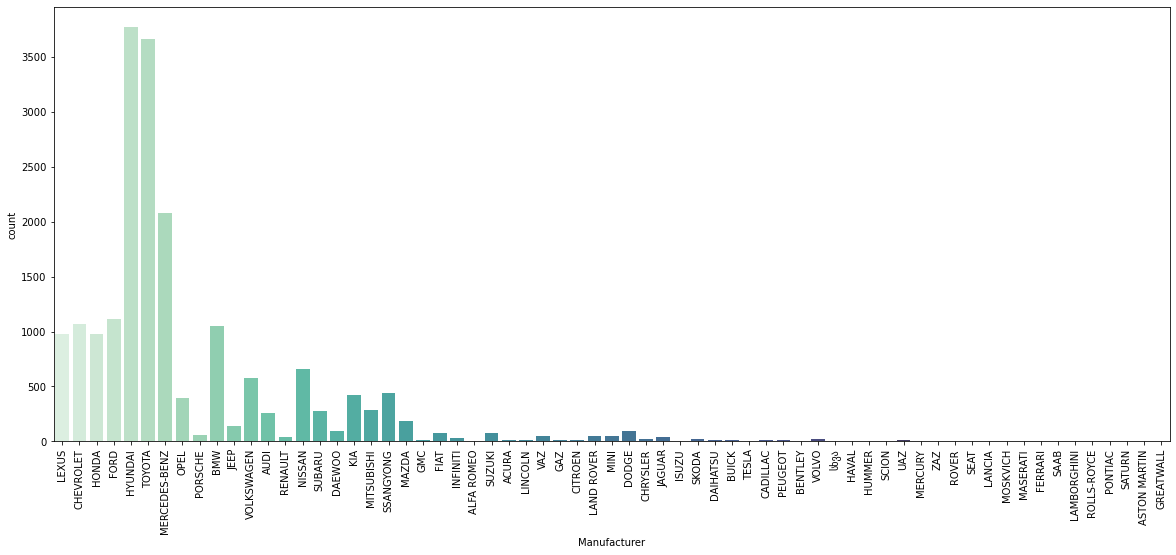

In [17]:
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90)
sns.countplot(x = 'Manufacturer', data = train_df, palette="mako_r")

## Inference:

- **`Hyundai` is the most common car manufacturer followed by `Toyota`, both of them majorly deals in family cars** 
    
    - **1. Many luxury brands don't have much presence, these cars are niche and low in numbers**

In [18]:
manufacturer_mean_price = train_df.groupby('Manufacturer')['Price'].mean()

<BarContainer object of 65 artists>

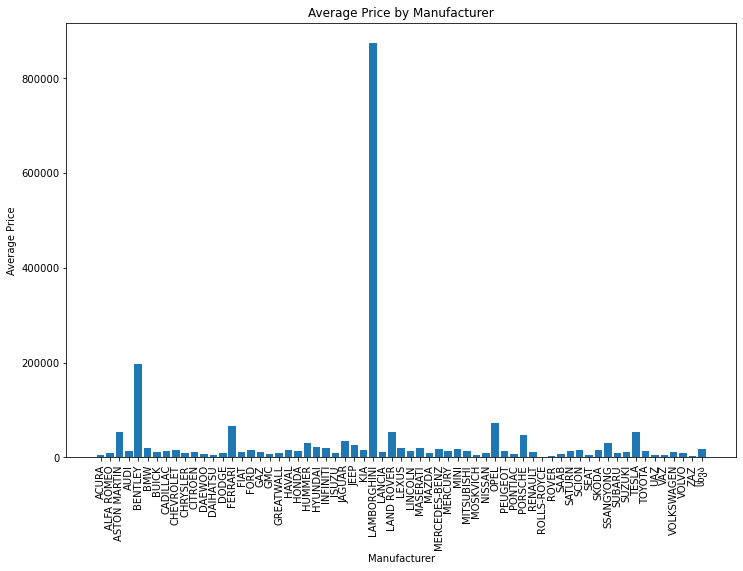

In [19]:
plt.figure(figsize=(12,8))
plt.ylabel('Average Price')
plt.xlabel('Manufacturer')
plt.title('Average Price by Manufacturer')
plt.xticks(rotation = 90)
plt.bar(manufacturer_mean_price.index, manufacturer_mean_price)

## Inference:
- **Lamborghini has the highest mean price of the lot, in presence of other luxury car manufacturer**
     - **We can conclude that the number of lamborghinis are substantially higher as compared to the other luxury car manufacturers**
- **We also can infer the high count of 'Hyundai' and 'Toyota' can be attributed to their low prices**

In [20]:
train_df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,04,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,04,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,04,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,04,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,04,Left wheel,Silver,4


In [21]:
# Creating an 'Age' column
# 'Age' is the difference in Production year and the current year

current_year = 2021

train_df['Age'] = train_df['Prod. year'].apply(lambda x : current_year - x)
test_df['Age'] = train_df['Prod. year'].apply(lambda x : current_year - x)

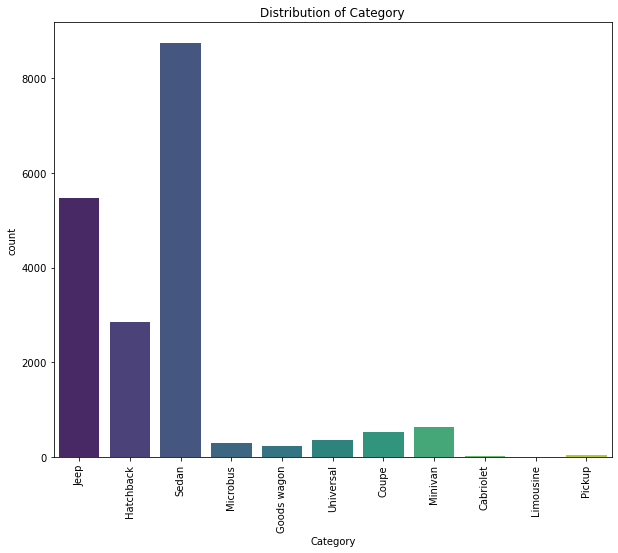

In [22]:
# Visualising the column 'Category'
plt.figure(figsize=(10,8))
plt.xticks(rotation = 90)
plt.title('Distribution of Category')
ax = sns.countplot(x = 'Category', data = train_df, palette = 'viridis')

## Inference:

- **`Sedan` class is the most common category in the dataset, followed by `Jeep`**

<BarContainer object of 11 artists>

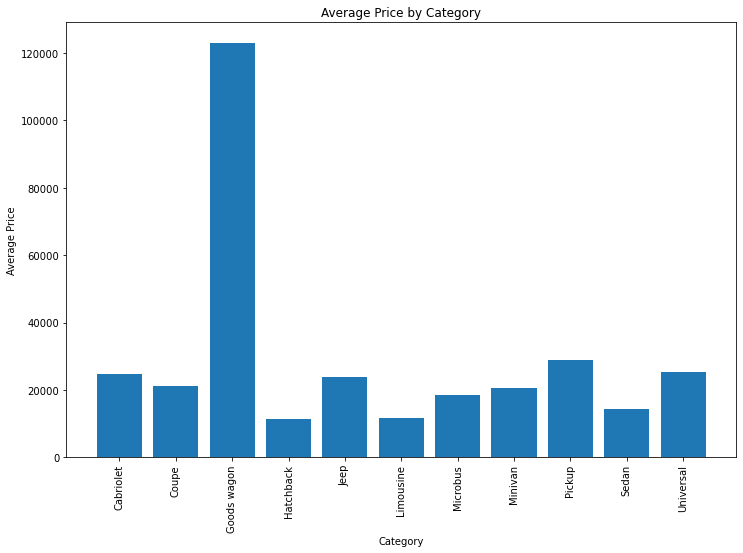

In [23]:
# Let's see the category wise average price of the cars

df_category_meanPrice = train_df.groupby('Category')['Price'].mean()
plt.figure(figsize=(12,8))
plt.ylabel('Average Price')
plt.xlabel('Category')
plt.title('Average Price by Category')
plt.xticks(rotation = 90)
plt.bar(df_category_meanPrice.index, df_category_meanPrice)

## Inference:

- **`Good wagon` have the highest average price, which makes financial sense as these wagons are very expensive.**
- **`Sedan` have lower mean price, which corresponds to their high selling numbers**

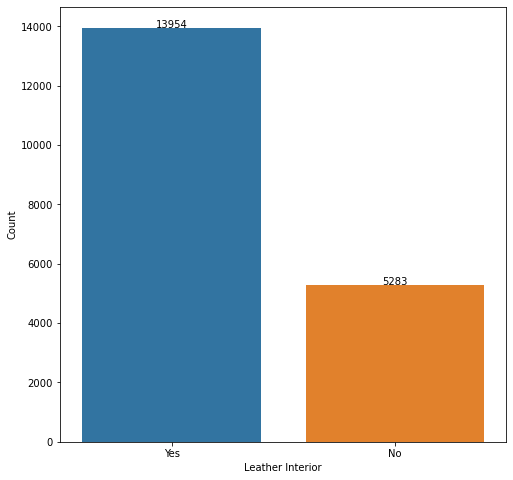

In [24]:
# Distribution of the 'Leather interior' column

labels = train_df['Leather interior'].value_counts().index
values = train_df['Leather interior'].value_counts().values

plt.figure(figsize = (8, 8))
plt.xlabel('Leather Interior')
plt.ylabel('Count')
ax = sns.barplot(x=labels, y=values)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")

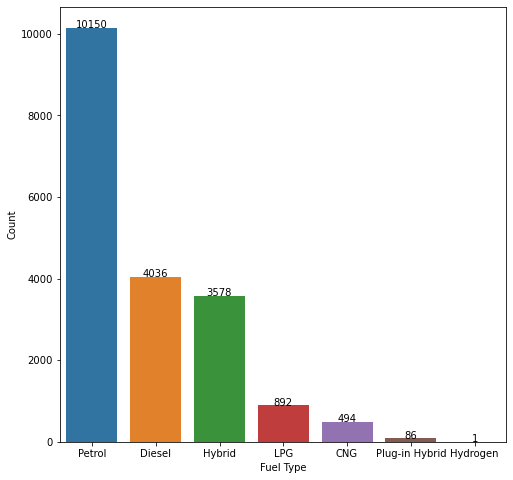

In [25]:
# Distribution of 'Fuel type' columns

labels = train_df['Fuel type'].value_counts().index
values = train_df['Fuel type'].value_counts().values

plt.figure(figsize = (8, 8))
plt.xlabel('Fuel Type')
plt.ylabel('Count')
ax = sns.barplot(x=labels, y=values)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1, values[i],ha="center")

## Inference:

- **`Petrol` car types have the highest market share.**
    - **Interesting to note, that `Hybrid cars` and `Diesel cars` have almost equal market share.** 

<BarContainer object of 7 artists>

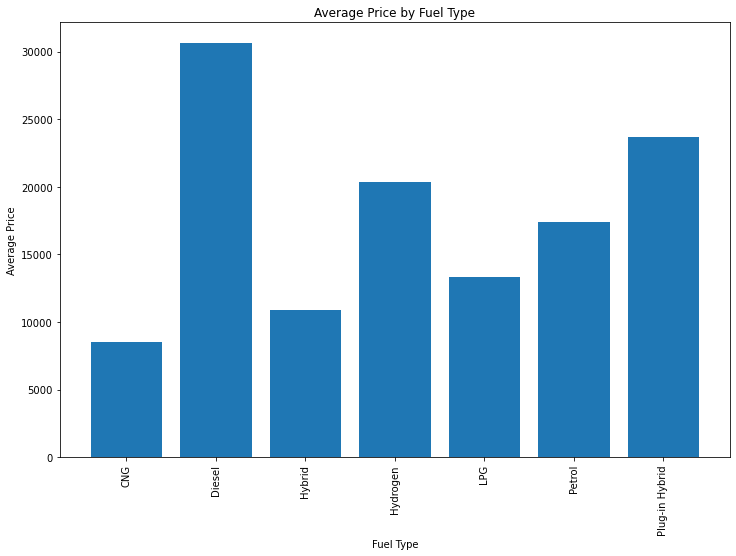

In [26]:
df_fueltype_meanPrice = train_df.groupby('Fuel type')['Price'].mean()
plt.figure(figsize=(12,8))
plt.ylabel('Average Price')
plt.xlabel('Fuel Type')
plt.title('Average Price by Fuel Type')
plt.xticks(rotation = 90)
plt.bar(df_fueltype_meanPrice.index, df_fueltype_meanPrice)

## Inference:

- **`Diesel` cars are have the highest average price.**
    - **The hydrogen car present in category is the 'only one', hence we see it's value such high in number.**

In [27]:
train_df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [28]:
# Creating a 'Turbo' column, against the rows with Turbo in their Engine volume
# Presence of Turbo - 1
# Absence of Turbo - 0

turbo_train = []

for i in train_df['Engine volume'].str.split(' '):
    if 'Turbo' in i:
        turbo_train.append(1)
    else:
        turbo_train.append(0)

        
turbo_test = []
for i in test_df['Engine volume'].str.split(' '):
    if 'Turbo' in i:
        turbo_test.append(1)
    else:
        turbo_test.append(0)

In [29]:
train_df['Engine volume'] = train_df['Engine volume'].apply(lambda x: x.split(' ')[0])

In [30]:
test_df['Engine volume'] = test_df['Engine volume'].apply(lambda x: x.split(' ')[0])

In [31]:
train_df['Turbo'] = turbo_train
test_df['Turbo'] = turbo_test

In [32]:
train_df['Mileage'] = train_df['Mileage'].astype('int')
test_df['Mileage'] = test_df['Mileage'].astype('int')

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Mileage Spread'}, ylabel='Mileage'>

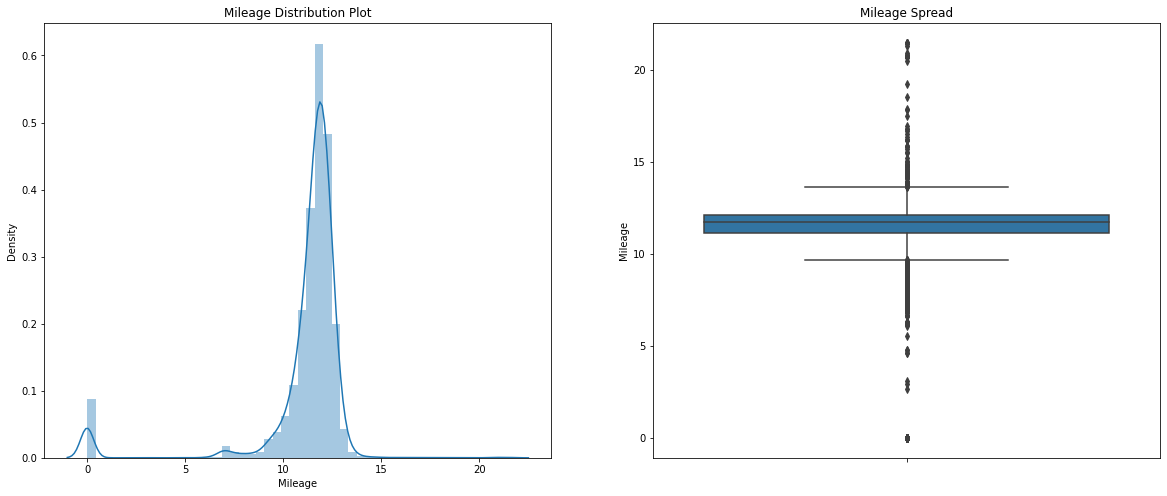

In [33]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Mileage Distribution Plot')
sns.distplot(np.log1p(train_df.Mileage),hist=True)


plt.subplot(1,2,2)
plt.title('Mileage Spread')
sns.boxplot(y=np.log1p(train_df.Mileage))


## Inference:

- **There are cars present with `0 mileage` as value. This needs numerical correction, as this would physically impossible**

In [34]:
train_df['Mileage'] = train_df['Mileage'].astype('int')

In [35]:
train_df.loc[train_df.Mileage == 0]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age,Turbo
11,45814819,8781,0,FORD,Transit,1999,Microbus,No,CNG,4,0,8.0,Manual,Rear,02,Left wheel,Blue,0,22,0
24,45813492,4704,0,OPEL,Vectra,1995,Sedan,No,Petrol,1.8,0,4.0,Automatic,Front,04,Left wheel,Green,4,26,0
26,45759112,549,2455,LEXUS,GX 470,2008,Jeep,Yes,Petrol,4.7,0,8.0,Automatic,4x4,04,Left wheel,White,0,13,0
83,45765301,8154,0,HONDA,Cr-v,1998,Jeep,No,Petrol,2,0,4.0,Automatic,4x4,04,Right-hand drive,White,2,23,0
97,45749534,4234,0,HONDA,Civic,1997,Hatchback,Yes,Petrol,1.4,0,4.0,Manual,Front,02,Left wheel,Blue,6,24,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,45791823,2900,0,BMW,320,1994,Sedan,Yes,Petrol,2,0,6.0,Manual,Rear,04,Left wheel,Green,2,27,0
19088,45782030,2200,0,PEUGEOT,406,2001,Sedan,No,Petrol,2,0,4.0,Manual,Front,04,Left wheel,White,2,20,0
19103,45748748,30,0,NISSAN,Tiida,2006,Hatchback,No,Petrol,1.5,0,4.0,Automatic,Front,04,Right-hand drive,Black,4,15,0
19218,45748699,30,0,NISSAN,Note,2006,Hatchback,No,Petrol,1.3,0,4.0,Automatic,Front,04,Right-hand drive,Green,9,15,0


In [36]:
train_df['Mileage'].replace(0, train_df['Mileage'].median(), inplace = True)

In [37]:
test_df['Mileage'].replace(0, test_df['Mileage'].median(), inplace = True)

<AxesSubplot:title={'center':'Distribution of cylinders present'}, xlabel='Cylinders', ylabel='count'>

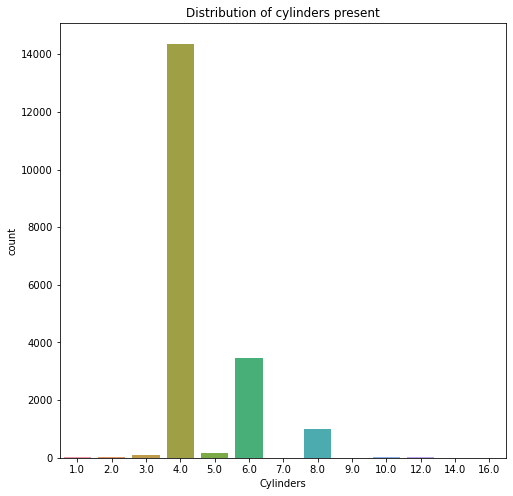

In [38]:
plt.figure(figsize=(8,8))
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.title('Distribution of cylinders present')
sns.countplot(x = train_df['Cylinders'])

In [39]:
train_df['Cylinders'] = train_df['Cylinders'].astype('int')

In [40]:
test_df['Cylinders'] = test_df['Cylinders'].astype('int')

C:\Users\suraj\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Cylinders Spread'}, ylabel='Cylinders'>

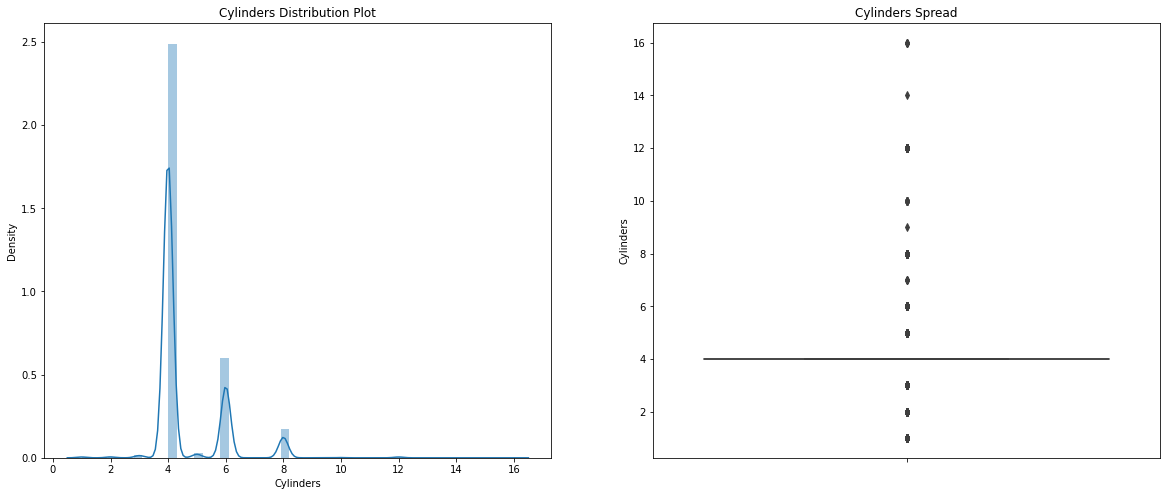

In [41]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Cylinders Distribution Plot')
sns.distplot((train_df.Cylinders),hist=True )


plt.subplot(1,2,2)
plt.title('Cylinders Spread')
sns.boxplot(y = train_df.Cylinders)


In [42]:
print(train_df['Cylinders'].describe())

count    19237.000000
mean         4.582991
std          1.199933
min          1.000000
25%          4.000000
50%          4.000000
75%          4.000000
max         16.000000
Name: Cylinders, dtype: float64


## Inference:

- **`75%` of the cars have `4 cylinders`**
- **`16` is the highest number for cylinders present**

In [43]:
# 'Tesla' cars don't have cylinders in them, we will reassign them with a '0 cylinders'
train_df.loc[train_df.Manufacturer == 'TESLA']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Age,Turbo
2010,45751914,53941,87,TESLA,Model X,2018,Sedan,Yes,Petrol,0,81907,6,Automatic,4x4,04,Left wheel,Silver,12,3,0


In [44]:
train_df.loc[train_df.Manufacturer == 'TESLA', 'Cylinders'] = 0

<AxesSubplot:xlabel='Cylinders', ylabel='Price'>

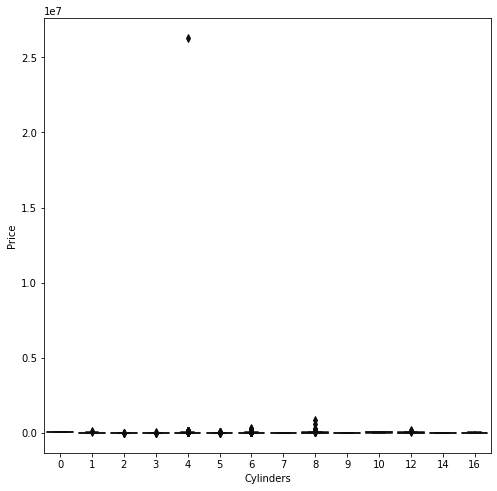

In [45]:
plt.figure(figsize=(8,8))
sns.boxplot(x = train_df.Cylinders, y = train_df.Price, palette=("cubehelix"))

<AxesSubplot:xlabel='Cylinders', ylabel='Price'>

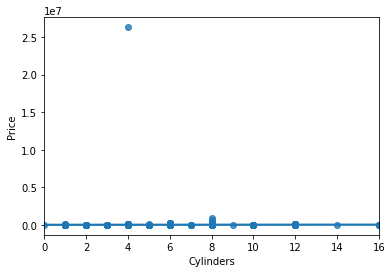

In [46]:
sns.regplot(x = 'Cylinders', y = 'Price', data = train_df)

<AxesSubplot:title={'center':'Distribution of Gear box present'}, xlabel='Gear box type', ylabel='count'>

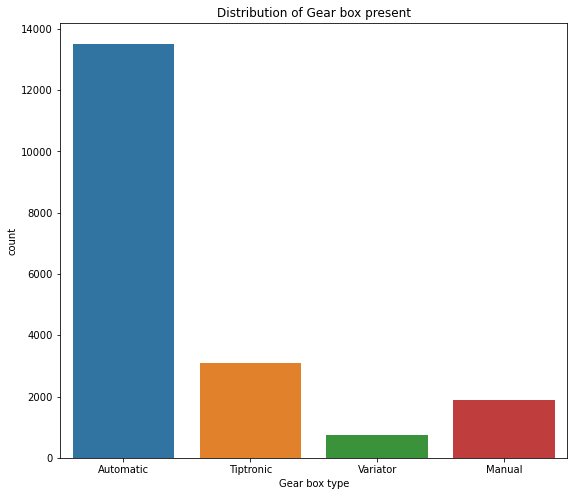

In [47]:
# Checking the distribution of 'Gear box type'
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution of Gear box present')
sns.countplot(x = 'Gear box type', data = train_df)


Gear box type
Automatic    15974.326032
Manual       25614.896533
Tiptronic    26448.307221
Variator     14762.399464
Name: Price, dtype: float64


<AxesSubplot:title={'center':'Average price by Gear box type'}, xlabel='Gear box type', ylabel='Average Price'>

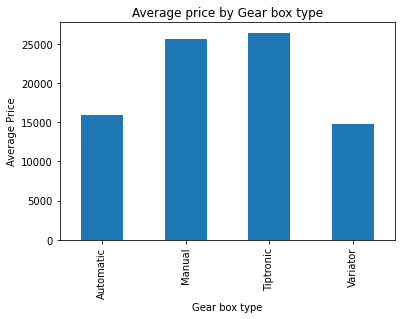

In [48]:
print(train_df.groupby('Gear box type')['Price'].mean())
plt.title('Average price by Gear box type')
plt.ylabel('Average Price')
train_df.groupby('Gear box type')['Price'].mean().plot(kind = 'bar')

## Inference:

- **`Automatic cars` have the highest count.**
    - **Even with their low numbers, `Manual cars` have higher average prices, this can be attributed perhaps to their antiquity.**

<AxesSubplot:title={'center':'Distribution of Drive Wheels'}, xlabel='Drive wheels', ylabel='count'>

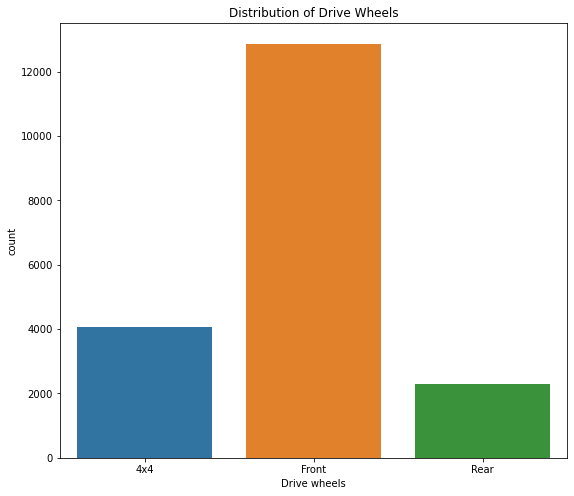

In [49]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution of Drive Wheels')
sns.countplot(x = train_df['Drive wheels'], data = train_df)


Drive wheels
4x4      19535.423854
Front    18491.339055
Rear     17192.244252
Name: Price, dtype: float64


<AxesSubplot:title={'center':'Average price by Drive wheels'}, xlabel='Drive wheels', ylabel='Average Price'>

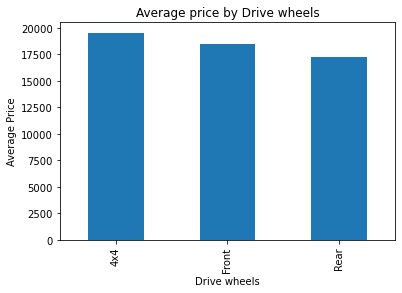

In [50]:
print(train_df.groupby('Drive wheels')['Price'].mean())
plt.title('Average price by Drive wheels')
plt.ylabel('Average Price')
train_df.groupby('Drive wheels')['Price'].mean().plot(kind = 'bar')

## Inference:

- **`Front Wheel` drives have the highest count.**
- **The average price of the three different drive wheels vehicle doesn't vary much from each other**\
    - **The drive wheel is not signifant in deciding the price**

<AxesSubplot:title={'center':'Distribution of Doors present'}, xlabel='Doors', ylabel='count'>

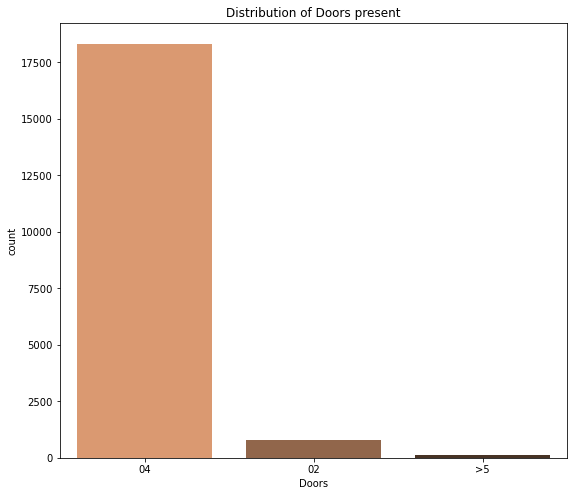

In [51]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution of Doors present')
sns.countplot(x = train_df['Doors'], data = train_df, palette = 'copper_r')


Doors
02    50379.595882
04    17180.945778
>5    22299.437500
Name: Price, dtype: float64


<AxesSubplot:title={'center':'Average price by Gear box type'}, xlabel='Doors', ylabel='Average Price'>

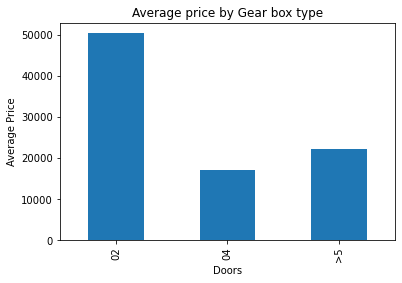

In [52]:
print(train_df.groupby('Doors')['Price'].mean())
plt.title('Average price by Gear box type')
plt.ylabel('Average Price')
train_df.groupby('Doors')['Price'].mean().plot(kind = 'bar')

## Inference: 

- **`4 doors` car are most common category available.**
- **Average price of `2 doors` have greater value as compared to other door types car, as these cars are luxury sports car, which is in tandem to their price levels.**

<AxesSubplot:title={'center':'Distribution of Doors present'}, xlabel='Wheel', ylabel='count'>

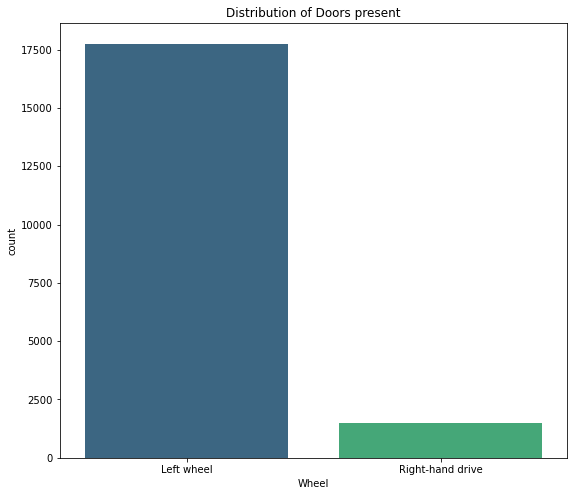

In [53]:
# Distribution the column 'Wheel'

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution of Doors present')
sns.countplot(x = train_df['Wheel'], data = train_df, palette='viridis')


Wheel
Left wheel          19363.071425
Right-hand drive     8900.111186
Name: Price, dtype: float64


<AxesSubplot:title={'center':'Average price by Gear box type'}, xlabel='Wheel', ylabel='Average Price'>

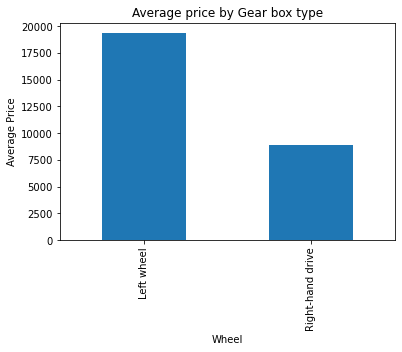

In [54]:
print(train_df.groupby('Wheel')['Price'].mean())
plt.title('Average price by Gear box type')
plt.ylabel('Average Price')
train_df.groupby('Wheel')['Price'].mean().plot(kind = 'bar')

- **`Left wheel` drive has the highest count in the car types.**

<AxesSubplot:title={'center':'Distribution of Colors present'}, xlabel='Color', ylabel='count'>

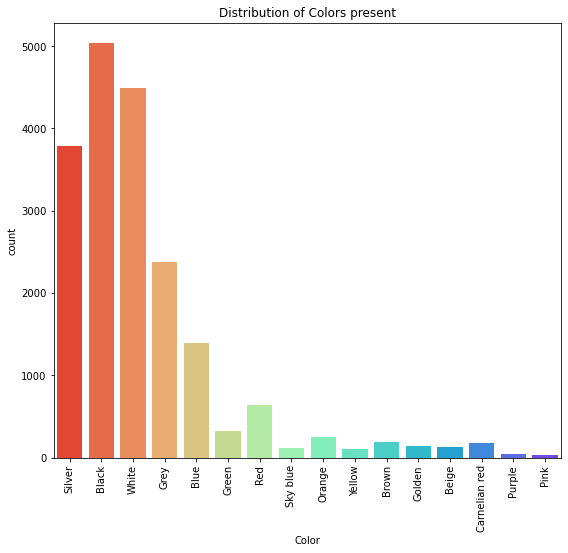

In [55]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Distribution of Colors present')
plt.xticks(rotation = 90)
sns.countplot(x = train_df['Color'], data = train_df, palette='rainbow_r')


Color
Beige            15627.559701
Black            18886.917346
Blue             33726.850287
Brown            19709.636364
Carnelian red    15820.927374
Golden           14678.551724
Green             9449.677019
Grey             19203.448000
Orange           13008.422925
Pink             10649.076923
Purple            8837.384615
Red              13553.275430
Silver           15091.806962
Sky blue         14079.000000
White            18204.295389
Yellow           20666.584906
Name: Price, dtype: float64


<AxesSubplot:title={'center':'Average price by Color type'}, xlabel='Color', ylabel='Average Price'>

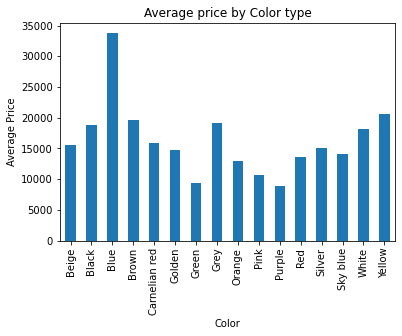

In [56]:
print(train_df.groupby('Color')['Price'].mean())
plt.title('Average price by Color type')
plt.ylabel('Average Price')
train_df.groupby('Color')['Price'].mean().plot(kind = 'bar')

- **The color `Black` is the most common color present for cars.**
- **The average price for `Blue color` cars is the highest, this could be due multiple reasons, and would required further investigation**

In [57]:
train_df['Airbags'] = train_df['Airbags'].astype('int')
test_df['Airbags'] = test_df['Airbags'].astype('int')

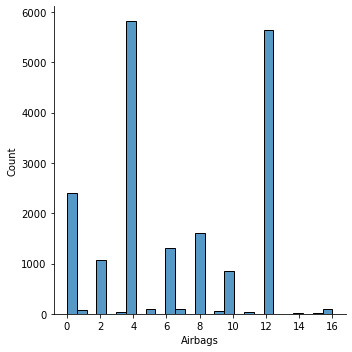

In [58]:
sns.displot(train_df['Airbags'])

Airbags
0     23406.698129
1     10890.618421
2     10599.031895
3      8726.216216
4     22573.902284
5     10936.730769
6     15700.722349
7     16686.395349
8     18435.202736
9     20206.222222
10    22946.287397
11    17538.939394
12    13856.812345
13     6284.500000
14    26659.400000
15    39201.428571
16    37318.741935
Name: Price, dtype: float64


<AxesSubplot:title={'center':'Average price by Color type'}, xlabel='Airbags', ylabel='Average Price'>

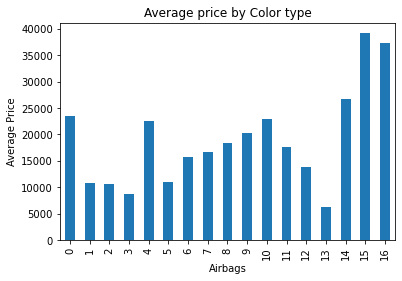

In [59]:
print(train_df.groupby('Airbags')['Price'].mean())
plt.title('Average price by Color type')
plt.ylabel('Average Price')
train_df.groupby('Airbags')['Price'].mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Airbags', ylabel='Price'>

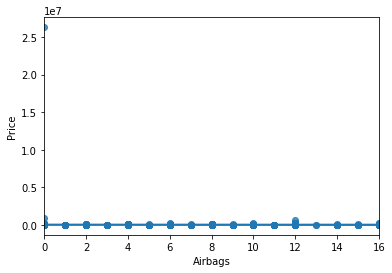

In [60]:
sns.regplot(x = 'Airbags', y = 'Price', data = train_df)

In [61]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                19237 non-null  int64 
 1   Price             19237 non-null  int64 
 2   Levy              19237 non-null  object
 3   Manufacturer      19237 non-null  object
 4   Model             19237 non-null  object
 5   Prod. year        19237 non-null  int64 
 6   Category          19237 non-null  object
 7   Leather interior  19237 non-null  object
 8   Fuel type         19237 non-null  object
 9   Engine volume     19237 non-null  object
 10  Mileage           19237 non-null  int32 
 11  Cylinders         19237 non-null  int32 
 12  Gear box type     19237 non-null  object
 13  Drive wheels      19237 non-null  object
 14  Doors             19237 non-null  object
 15  Wheel             19237 non-null  object
 16  Color             19237 non-null  object
 17  Airbags     

In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   int32  
 10  Cylinders         8245 non-null   int32  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int32  


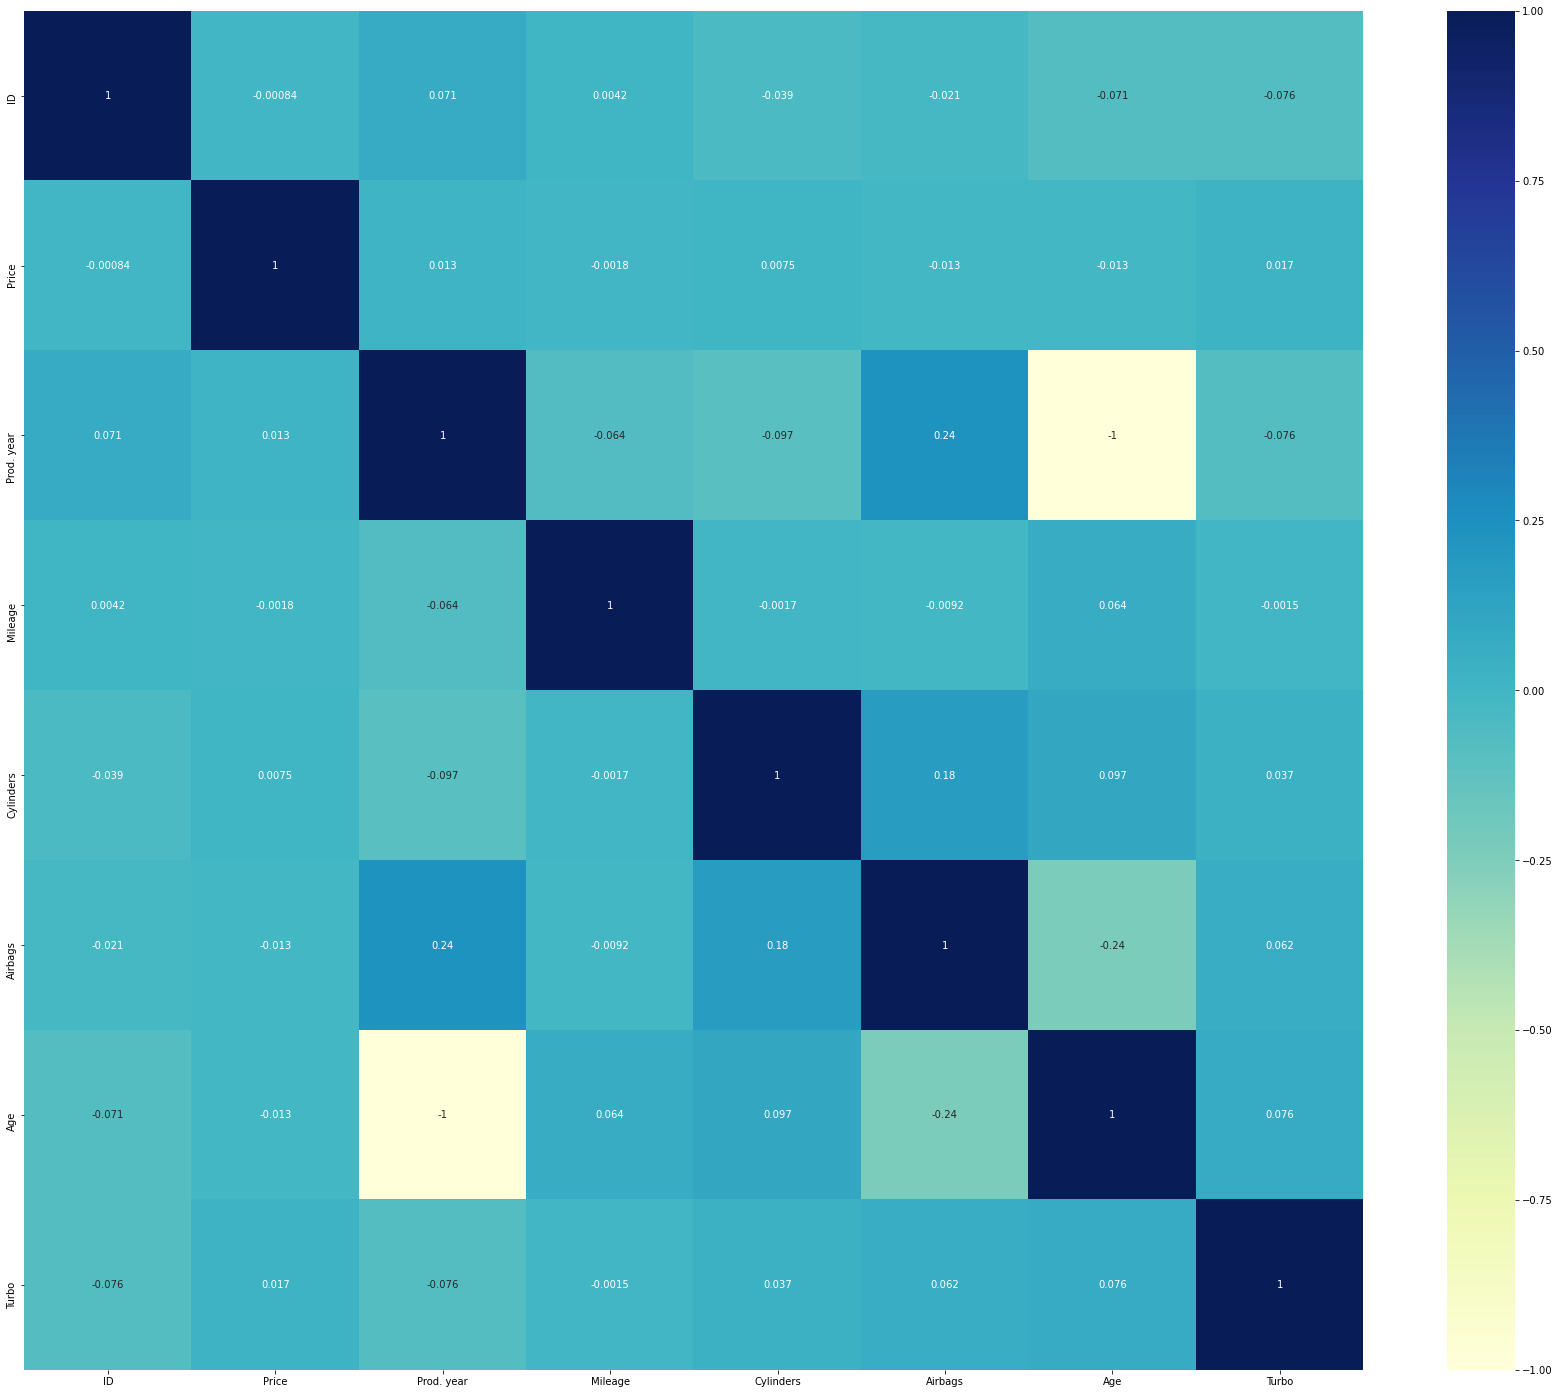

In [63]:
# Correlation plot

plt.figure(figsize = (30, 25))
sns.heatmap(train_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [64]:
# Dropping 'Prod. year' column, as it negatively correlated (-1) with 'Age'

train_df.pop('Prod. year')

0        2010
1        2011
2        2006
3        2011
4        2014
         ... 
19232    1999
19233    2011
19234    2010
19235    2007
19236    2012
Name: Prod. year, Length: 19237, dtype: int64

In [65]:
test_df.pop('Prod. year')

0       2012
1       2012
2       2005
3       2012
4       1993
        ... 
8240    2004
8241    2012
8242    2015
8243    2017
8244    2012
Name: Prod. year, Length: 8245, dtype: int64

In [66]:
# Dropping column 'Model', since it doesn't provide much information.

del train_df['Model']
del test_df['Model']

In [67]:
def dummies(x,df): 
    '''returns Dataframe with dummified columns
    args: x = column name, df = dataframe'''
    
    temp = pd.get_dummies(df[x], prefix=x, drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [68]:
train_df.select_dtypes('object').columns

Index(['Levy', 'Manufacturer', 'Category', 'Leather interior', 'Fuel type',
       'Engine volume', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel',
       'Color'],
      dtype='object')

In [69]:
train_df.select_dtypes('int').columns.append(train_df.select_dtypes('int64').columns)

Index(['Mileage', 'Cylinders', 'Airbags', 'ID', 'Price', 'Age', 'Turbo'], dtype='object')

In [70]:
train_df['Levy'] = train_df['Levy'].astype('int')
test_df['Levy'] = test_df['Levy'].astype('int')

In [71]:
train_df['train'] = 1
test_df['train'] = 0

In [72]:
combined_df = pd.concat([train_df, test_df])

In [73]:
combined_df = dummies('Manufacturer', combined_df)
combined_df = dummies('Category', combined_df)
combined_df = dummies('Leather interior', combined_df)
combined_df = dummies('Fuel type', combined_df)
combined_df = dummies('Engine volume', combined_df)
combined_df = dummies('Gear box type', combined_df)
combined_df = dummies('Drive wheels', combined_df)
combined_df = dummies('Doors', combined_df)
combined_df = dummies('Wheel', combined_df)
combined_df = dummies('Color', combined_df)

In [74]:
combined_df.head()

,ID,Price,Levy,Mileage,Cylinders,Airbags,Age,Turbo,train,Manufacturer_ALFA ROMEO,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328.0,1399,186005,6,12,11,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,44731507,16621.0,1018,192000,6,8,10,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,45774419,8467.0,0,200000,4,2,15,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,45769185,3607.0,862,168966,4,0,10,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,45809263,11726.0,446,91901,4,4,7,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [75]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27482 entries, 0 to 8244
Columns: 189 entries, ID to Color_Yellow
dtypes: float64(1), int32(4), int64(4), uint8(180)
memory usage: 6.4 MB


In [76]:
train_df = combined_df[combined_df['train'] == 1]
test_df = combined_df[combined_df['train'] == 0]

In [77]:
train_df.drop(['train'], axis = 1, inplace = True)
test_df.drop(['train'], axis =1, inplace = True)

C:\Users\suraj\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [78]:
train_df.head()

,ID,Price,Levy,Mileage,Cylinders,Airbags,Age,Turbo,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328.0,1399,186005,6,12,11,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44731507,16621.0,1018,192000,6,8,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45774419,8467.0,0,200000,4,2,15,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45769185,3607.0,862,168966,4,0,10,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,45809263,11726.0,446,91901,4,4,7,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [79]:
from sklearn.preprocessing import StandardScaler,scale
#we create an object of the class StandardScaler
sc = StandardScaler() 

In [80]:
train_df.select_dtypes('int').columns.tolist()

['Levy', 'Mileage', 'Cylinders', 'Airbags']

In [81]:
# Columns to scale

col_to_scale = train_df.select_dtypes('int').columns.tolist()

In [82]:
col_to_scale.append('Age')

In [83]:
col_to_scale # final list to scale

['Levy', 'Mileage', 'Cylinders', 'Airbags', 'Age']

In [84]:
train_df[col_to_scale] = sc.fit_transform(train_df[col_to_scale])
test_df[col_to_scale] = sc.fit_transform(test_df[col_to_scale])

train_df.head()

<ipython-input-84-b0327a599d41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[col_to_scale] = sc.fit_transform(train_df[col_to_scale])
C:\Users\suraj\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-84-b0327a599d41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,ID,Price,Levy,Mileage,Cylinders,Airbags,Age,Turbo,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328.0,1.350118,-0.027911,1.180792,1.254005,0.161034,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44731507,16621.0,0.678997,-0.027787,1.180792,0.328091,-0.015379,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45774419,8467.0,-1.114182,-0.027622,-0.485439,-1.060780,0.866685,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45769185,3607.0,0.404207,-0.028263,-0.485439,-1.523737,-0.015379,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,45809263,11726.0,-0.328565,-0.029855,-0.485439,-0.597823,-0.544617,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [85]:
from sklearn.model_selection import train_test_split

In [86]:
del train_df['ID']

test_id = test_df['ID']

del test_df['ID']

In [87]:
X = train_df.drop(['Price'], axis = 1)
y = train_df['Price']

In [88]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [89]:
del test_df['Price']

In [90]:
len(train_df.columns)

187

In [91]:
len(test_df.columns)

186

In [107]:
from sklearn.ensemble import RandomForestRegressor

In [114]:
rfr = RandomForestRegressor(random_state = 1)

In [116]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
n_estimators = [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)]

In [118]:
max_features = ['auto', 'log2']

In [119]:
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]

In [120]:
max_depth.append(None)

In [121]:
bootstrap = [True, False]

In [123]:
random_grid = {'n_estimators': n_estimators,

               'max_features': max_features,

               'max_depth': max_depth,

               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'bootstrap': [True, False]}


In [125]:
rfr_random = RandomizedSearchCV(estimator=rfr, param_distributions=r_grid, n_iter = 20, scoring='neg_mean_absolute_error', cv = 3, verbose=2, random_state=42, n_jobs=-1, return_train_score=True)

rfr_random.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=1),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, None],
                                        'max_features': ['auto', 'log2'],
                                        'n_estimators': [5, 6, 7, 8, 9, 10, 11,
                                                         12, 13, 15]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=2)

In [127]:
print(rfr_random.best_params_)

{'n_estimators': 15, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}


In [129]:
print(rfr_random.score(X_val , y_val))

-5537.18549894917


In [130]:
rfr_hyper_tuned = rfr_random.best_estimator_

In [132]:
pred_rfr_tuned = rfr_hyper_tuned.predict(test_df)

In [134]:
rfr_tuned_dict = {'Price' : pred_rfr_tuned}

In [135]:
rfr_tuned_df = pd.DataFrame.from_dict(rfr_tuned_dict)

In [137]:
rfr_tuned_df.to_csv('Rfr_submission.csv')

In [139]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [157]:
from sklearn.metrics import mean_squared_log_error

In [161]:
# grid search
from xgboost import XGBRFRegressor

model = XGBRFRegressor()

param_grid = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              
              'min_child_weight' : [0.0001, 0.5, 0.001],
              
              'gamma': [0.0,40.0,0.005],
              
              'learning_rate': [0.0005,0.3,0.0005],
              
              'subsample': [0.01,1.0,0.01],
              
              'colsample_bylevel': np.round(np.arange(0.1,1.0,0.01)),
              
              'colsample_bytree': [0.1,1.0,0.01]}

kfold = KFold(n_splits=10, shuffle=True, random_state=10)
grid_search = RandomizedSearchCV(model, param_grid, scoring='neg_mean_squared_error', n_iter = 500, cv=kfold)
grid_result = grid_search.fit(X_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_[ 'mean_test_score' ]
stds = grid_result.cv_results_[ 'std_test_score' ]
params = grid_result.cv_results_[ 'params' ]


Best: -54189047878.034515 using {'subsample': 0.01, 'min_child_weight': 0.001, 'max_depth': 12, 'learning_rate': 0.3, 'gamma': 40.0, 'colsample_bytree': 1.0, 'colsample_bylevel': 1.0}


In [163]:
xgb_reg = grid_result.best_estimator_

In [164]:
y_pred_xgb = xgb_reg.predict(test_df)

In [165]:
 dic_xgb = {'Price' : y_pred_xgb}

In [166]:
xgb_df = pd.DataFrame.from_dict(dic_xgb)

In [167]:
xgb_df.to_csv('xgb_submiission.csv')